In [ ]:
# ANALISI PRELIMINARE SUL DATASET 1

In [2]:
from netCDF4 import Dataset

In [3]:
nc = Dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')

In [4]:
type(nc)

netCDF4._netCDF4.Dataset

In [5]:
for i in nc.variables:
    print('{} : {}'.format(nc.variables[i].name, nc.variables[i].datatype))

lat : float32
lon : float32
time : float32
agl : float32


In [6]:
import xarray as xr

In [7]:
ncxr = xr.open_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')

In [8]:
ncxr

<xarray.Dataset>
Dimensions:  (lat: 1800, lon: 3600, time: 252)
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.95 -179.85 -179.75 ... 179.75 179.85 179.95
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2020-12-15
Data variables:
    agl      (time, lat, lon) float32 ...
Attributes:
    Conventions:        CF-1.6
    projection:         latlon
    authors:            N.Elguindi and C.Granier
    description:        Monthly emissions from CAMS-GLOB-ANT_v4.2 nh3 emissio...
    product_version:    v4.2
    title:              CAMS Global anthropogenic emissions
    institution:        Laboratoire d'Aérologie/CNRS 
    source:             EDGARv4.3.2 emissions up to 2010 and CEDS emissions u...
    references:         Granier, C., S. Darras, H. Denier van der Gon, J. Dou...
    distribution_date:  2020-11-19
    history:            lun. 29 juin 2020 18:42: Process from monthly to mont...

In [9]:
agl = ncxr['agl']

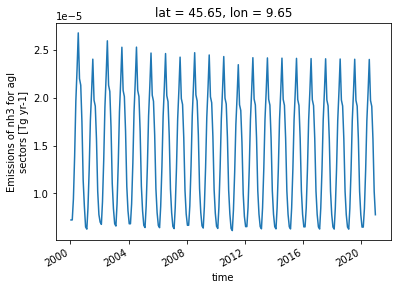

In [10]:
dsloc = ncxr.sel(lon=9.60,lat=45.69,method='nearest')
dsloc['agl'].plot()

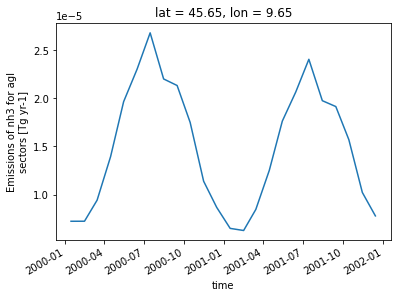

In [11]:
dsloc = ncxr.sel(lon=9.65,lat=45.69,method='nearest')
dsloc['agl'][0:24].plot()

In [12]:
nc.close()

In [ ]:
# ANALISI PRELIMINARE SUL DATASET 2

Monthly emissions from CAMS-GLOB-ANT_v4.2 nh3 emissions (annual emission*monthly profile)


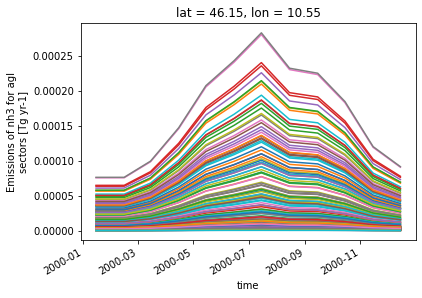

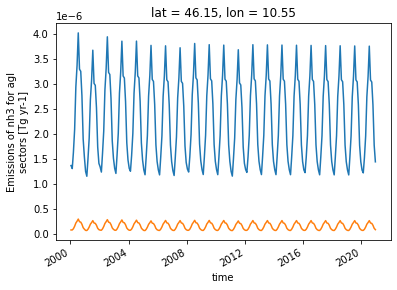

In [14]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')

dims = ds.dims
coords = ds.coords

print(ds.attrs['description'])

# Approx bounding box Lombardia
lat_bounds = slice(45, 46.2)
lon_bounds = slice(8.60, 10.60)

agl = ds.agl.sel(lat=lat_bounds, lon=lon_bounds)

plt.figure()
for i in range(12):
    for j in range(20):
        agl[:, i, j][0:12].plot()

plt.figure()
agl[:, 0, 0].plot()
agl[:, -1, -1].plot()

In [ ]:
# ANALISI PRELIMINARE SUL DATASET 3